# Proyek Analisis Data: [SHARING BIKE DATASET]
- **Nama:** Laili Pebianti Risya
- **Email:** lailirisya@gmail.com
- **ID Dicoding:** B202436E

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

1. Pada musim apa penyewaan sepeda dengan pelanggan registered paling sedikit?
2. Pada jam berapa penyewaan sepeda dengan pelanggan paling banyak dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install opendatasets

In [4]:
import opendatasets as od

In [18]:
dataset = 'https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset'

In [10]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  lailirisyab244036


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset


100%|████████████████████████████████████████████████████████████████████████████████| 286k/286k [00:01<00:00, 194kB/s]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [16]:
#menampilkan tabel day
day_df= pd.read_csv(".\\bike-sharing-dataset\\day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [8]:
#menampilkan tabel hour
hour_df= pd.read_csv(".\\bike-sharing-dataset\\hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Menampilkan tabel day
- Menampilkan tabel hour

### Assessing Data

In [120]:
#memeriksa tipe data pada tabel day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [122]:
#memeriksa tipe data pada kolom hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
#memeriksa missing value pada kolom day
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

dapat dilihat pada data diatas bahwa tidak terdapat missing value di dataframe day_df

In [126]:
#mengecek missing value pada kolom hour
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

dapat dilihat pada data diatas bahwa tidak terdapat missing value di dataframe hour_df

In [128]:
# memeriksa duplikasi dan parameter statistik pada tabel day
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [130]:
# memeriksa duplikasi dan parameter statistik pada tabel hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Memeriksa tipe data pada tabel day dan tabel hour
- Memeriksa missing value pada tabel day dan tabel hour
- Memeriksa adanya duplikasi data pada tabel day dan tabel hour

### Cleaning Data

In [134]:
#mengapus kolom instant
hour_df.drop(['instant'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)

In [120]:
#mengapus kolom instant
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

In [136]:
#mengubah nama kolom pada tabel day
day_df.rename(columns={'dteday' : 'date','yr':'year', 'mnth':'month', 'temp':'temperatur', 'hum' : 'humidity','cnt' : 'count'})

,date,season,year,month,holiday,weekday,workingday,weathersit,temperatur,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [118]:
#mengubah nama kolom pada tabel hour
hour_df.rename(columns={'dteday' : 'date','yr':'year', 'mnth':'month','hr' : 'hour', 'temp':'temperatur', 'hum' : 'humidity','cnt' : 'count'})

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperatur,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,0,Sun,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,Sun,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,Sun,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,Sun,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,Sun,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,1,12,19,0,Tue,1,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,1,12,20,0,Tue,1,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,1,12,21,0,Tue,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,1,12,22,0,Tue,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
#mengubah tipe data int menjadi category 
columns = ["season", "mnth", "holiday", "weekday", "weathersit"]
for column in columns:
  day_df[column] = day_df[column].astype("category")
  hour_df[column] = hour_df[column].astype("category")

In [18]:
#mengkonversi isi kolom pada tabel day
#season
day_df.replace(to_replace= {'season' : { 1 :'Spring', 2:'Summer', 3:'Fall', 4 :'Winter'}}, inplace=True)
hour_df.replace(to_replace= {'season' : { 1 :'Spring', 2:'Summer', 3:'Fall', 4 :'Winter'}}, inplace=True)

#year
day_df.replace(to_replace={ 'year' : {0 : 2011, 1: 2012}}, inplace=True)
hour_df.replace(to_replace={ 'year' : {0 : 2011, 1: 2012}}, inplace=True)

#month 
day_df.replace(to_replace= {'month' : {1 :'Jan', 2 :'Feb', 3 :'Mar', 4 :'Apr', 5 :'Mei', 6 : 'Jun', 7 :'Jul', 8 :'Aug', 9 :'Sept', 10 :'Oct', 11 :'Nov', 12:'Des' }}, inplace=True)
hour_df.replace(to_replace= {'month' : {1 :'Jan', 2 :'Feb', 3 :'Mar', 4 :'Apr', 5 :'Mei', 6 : 'Jun', 7 :'Jul', 8 :'Aug', 9 :'Sept', 10 :'Oct', 11 :'Nov', 12:'Des' }}, inplace=True)

#weekday 
day_df.replace(to_replace= {'weekday' : { 0 :'Mon', 1 : 'Tue', 2 :'Wed', 3 :'Thu', 4 :'Fri', 5 :'Sat', 6 :'Sun'}}, inplace=True)
hour_df.replace(to_replace= {'weekday' : { 0 :'Mon', 1 : 'Tue', 2 :'Wed', 3 :'Thu', 4 :'Fri', 5 :'Sat', 6 :'Sun'}}, inplace=True)

#weathersit
day_df.replace(to_replace= {'weathersit' : { 1 :'Clear', 2:'Mist', 3:'Light_Snow', 4 :'Heavy_Rain'}}, inplace=True)
hour_df.replace(to_replace= {'weathersit' : { 1 :'Clear', 2:'Mist', 3:'Light_Snow', 4 :'Heavy_Rain'}}, inplace=True)

# Menghitung Humidity
day_df=['humidity']*100
hour_df = ['humidity']*100

In [ ]:
# Membuat kolom baru bernama category yang menunjukan isi kolom tersebut weekend atau weekdays
weekday = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def get_category(one_of_week):
    if one_of_week in ["Sat", "Sun"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category"] = hour_df["weekday"].apply(get_category)
day_df["category"] = day_df["weekday"].apply(get_category)

**Insight:**
- Mengubah tipe data dari Integer ke Category
- Mengganti atau mengkonversikan isi kolom pada tabel day dan tabel hour

## Exploratory Data Analysis (EDA)

### Explore ...

In [172]:
#menampilkan rangkuman parameter statistik dari data day_df
day_df.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.000000,731.0,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,NaN,12.0,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,Fall,NaN,1.0,0.0,Mon,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,NaN,62.0,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.500684,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,0.500342,NaN,NaN,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa jumlah pelanggan sebanyak 731 orang.
dengan top pelanggan terbanyak terdapat pada hari senin dan pada musim fall

In [98]:
#menampilkan jumlah pelanggan registered berdasarkan season
day_df.groupby("season", observed=False).agg({
    "registered" : "sum"
})

,registered
season,
Fall,835038
Spring,410726
Summer,715067
Winter,711831


In [202]:
#menampilkan rangkuman parameter statistik dari data day_df
hour_df.describe(include='all')

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379.000000,17379.0,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,NaN,12.0,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,Fall,NaN,5.0,NaN,0.0,Sun,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,NaN,1488.0,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.502561,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,0.000000,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,NaN,1.000000,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,NaN,1.000000,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa jumlah pelanggan terbanyak terdapat pada jam 17.00 dengan top pelanggan terbanyak terdapat pada hari senin dengan kondisi cuaca clear

In [96]:
#menampilkan jumlah pelanggan casual berdasarkan jam
hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}) 

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


**Insight:**
- Menampilkan data jumlah pelanggan registered berdasarkan season
- Menampilkan data jumlah Pelanggan berdasarkan jam

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada musim apa penyewaan sepeda dengan pelanggan registered paling sedikit?

In [112]:
#Melakukan groupby
byseason_df = day_df.groupby("season").registered.sum().sort_values(ascending=False).reset_index()

In [92]:
#menampilkan jumlah pelanggan registered berdasarkan season
day_df.groupby("season",  observed=False).agg({
    "registered" : "sum"
})

,registered
season,
Fall,835038
Spring,410726
Summer,715067
Winter,711831


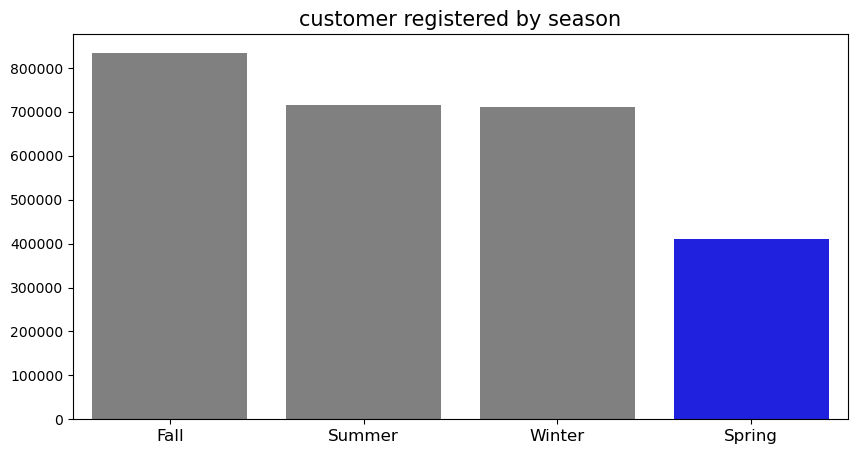

In [116]:
#Menampilkan data visual dengan jumlah pelanggan registered berdasarkan season

plt.figure(figsize=(10, 5))
colors = ['grey','grey','grey','blue']
sns.barplot(y="registered", x="season", hue = 'season',  data=byseason_df.sort_values(by="registered",  ascending=False),
    palette=colors
)
plt.title("customer registered by season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [ ]:
#Melakukan groupby
sum_order_items_df = hour_df.groupby("hr").cnt.sum().sort_values(ascending=False).reset_index()

Berdasarkan data diatas dapat dilihat bahwa penyewaan sepeda dengan pelanggan registered paling sedikit terdapat pada musim spring sebanyak 410726 orang pelanggan.

### Pertanyaan 2:

Pada jam berapa penyewaan sepeda dengan pelanggan paling banyak dan paling sedikit?

In [214]:
#menampilkan jumlah pelanggan casual berdasarkan jam
hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}) 

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


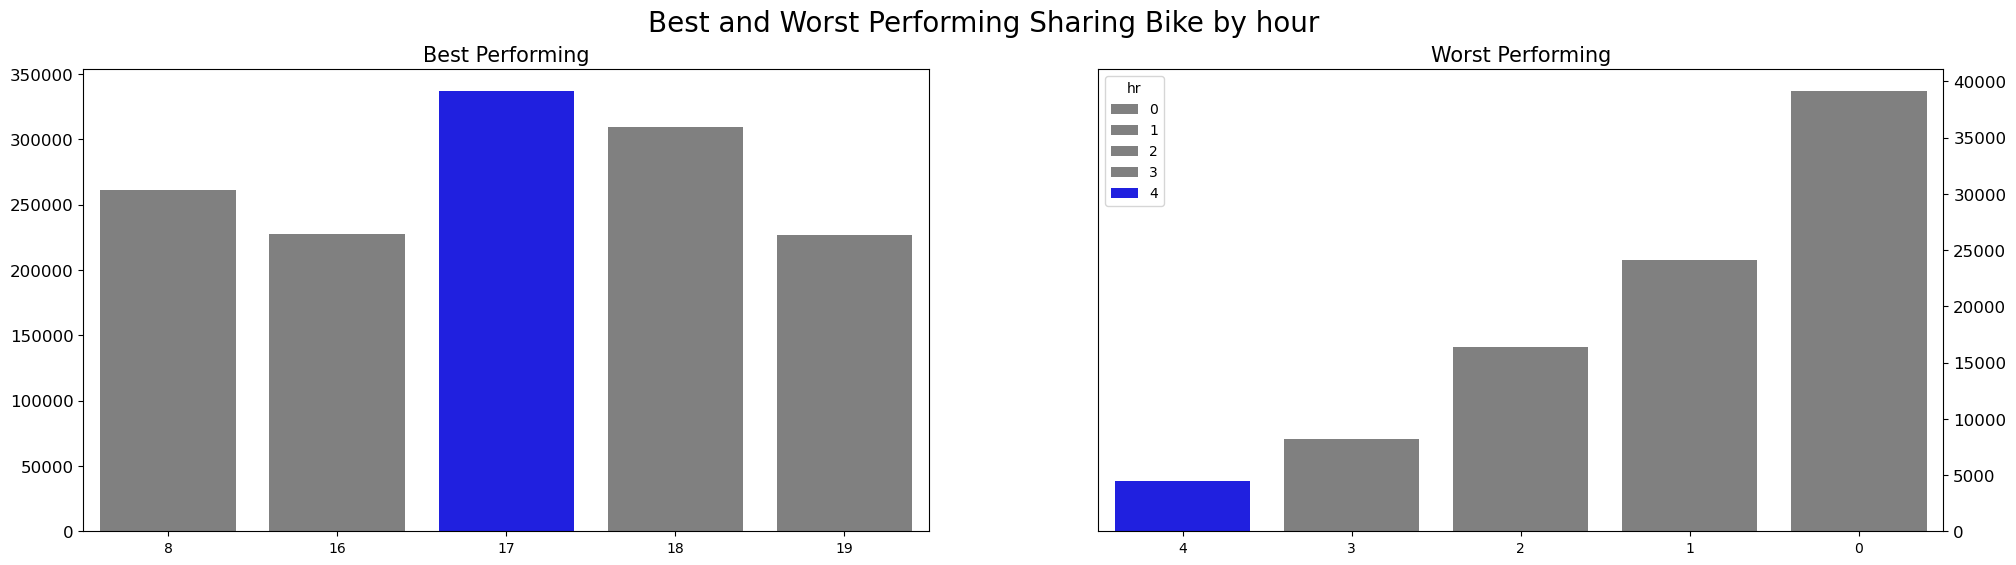

In [216]:
#Menampilkan data visual pelanggan berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors= ['grey','grey','blue','grey','grey']
colors1= ['grey','grey','grey','grey','blue']
sns.barplot(x="hr", hue= 'hr', y="cnt", data=sum_order_items_df.head(5),
            palette=colors, legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="hr", hue='hr', y="cnt", data=sum_order_items_df.sort_values(
    by="hr", ascending=True).head(5), palette=colors1, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Sharing Bike by hour", fontsize=20)
plt.show()

Berdasarkan data diatas dapat dilihat bahwa penyewaan sepeda dengan pelanggan terbanyak terdapat pada jam 17.00 dengan pelanggan sebanyak 336.860 orang. Sedangkan penyewaan sepeda dengan pelangan paling sedikit terdapat pada jam 04.00 dengan pelanggan sejumlah 8174 orang pelanggan. 

**Insight:**
- Menampilkan data visual dari jumlah pelanggan penyewaan sepeda registered berdasarkan season
-  berdasarkan data diatas dapat dilihat bahwa penyewaan sepeda dengan pelanggan registered paling sedikit terdapat pada musim spring sebanyak 410726 orang pelanggan.
- Menampilkan data visual dari jumlah pelanggan penyewaan sepeda berdasarkan jam
- Berdasarkan data diatas dapat dilihat bahwa penyewaan sepeda dengan pelanggan terbanyak terdapat pada jam 17.00 dengan pelanggan sebanyak 336.860 orang. 
sedangkan penyewaan sepeda dengan pelangan paling sedikit terdapat pada jam 04.00 dengan pelanggan sejumlah 8174 orang pelanggan.  

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Pada musim apa penyewaan sepeda dengan pelanggan registered paling sedikit?
-> Berdasarkan data dan gambar diatas dapat dilihat bahwa penyewaan sepeda dengan pelanggan registered paling sedikit terdapat pada musim spring sebanyak 410726 orang pelanggan.

- Conclution pertanyaan 2 : Pada jam berapa penyewaan sepeda dengan pelanggan paling banyak dan paling sedikit?
-> Berdasarkan data dan gambar diatas dapat dilihat bahwa penyewaan sepeda dengan pelanggan terbanyak terdapat pada jam 17.00 dengan pelanggan sebanyak 336.860 orang. Sedangkan penyewaan sepeda dengan pelangan paling sedikit terdapat pada jam 04.00 dengan pelanggan sejumlah 8174 orang.
